In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skopt import gp_minimize

In [ ]:
dims = 2*np.ones(20, dtype=int)
random_loss = np.random.rand(*tuple(dims))
random_loss

In [ ]:
np.min(random_loss)

In [ ]:
loss_fn = lambda a : random_loss[tuple(a)]

In [ ]:
a = np.ones(len(dims), dtype=int)
print(a)
loss_fn(a)

In [19]:
res = gp_minimize(loss_fn,                  # the function to minimize
                  [[0,1] for _ in range(len(dims))],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=150,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  n_jobs=5,
                  random_state=1234)   # the random seed

/opt/homebrew/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/homebrew/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/homebrew/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/homebrew/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/homebrew/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/homebrew/l

In [20]:
print(res)

          fun: 0.0006101155544391279
            x: [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0]
    func_vals: [ 9.427e-01  1.463e-01 ...  1.101e-01  3.620e-02]
      x_iters: [[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1], [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1], 

In [23]:
from assignment import AssignmentGame

game = AssignmentGame()
Q = 30
game = AssignmentGame(Q=Q)
K = 50
game.reset(num_packages = K)

{}

In [33]:
f = lambda x : -game.step(x, 1)[0]
res = gp_minimize(f,                  # the function to minimize
                  [[0,1] for _ in range(K)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=250,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  n_jobs=5,
                  x0=[1 for _ in range(K)],#np.ones(K, dtype = int),
                  random_state=1234)   # the random seed

/opt/homebrew/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/homebrew/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [34]:
print(res)

          fun: 1747.0
            x: [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
    func_vals: [ 1.128e+04  1.103e+04 ...  2.174e+03  2.017e+03]
      x_iters: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,

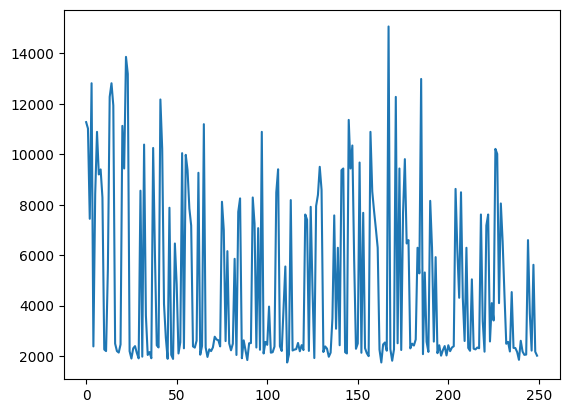

In [35]:
plt.plot(res['func_vals'])

In [17]:
import numpy.random as rd
def rand_neighbor(solution : np.ndarray, nb_changes = 1) :
    """
    Generates new random solution.
    :param solution: the solution for which we search a neighbor
    :param nb_changes: maximum number of the changes alowed
    :return: returns a random neighbor for the solution
    """
    new_solution = solution.astype(bool)
    i = rd.choice(len(new_solution), nb_changes, replace=False)
    new_solution[i] = ~new_solution[i]
    return new_solution.astype(int)

def recuit(loss_fn, T_init, T_limit, lamb = .99, var = False, id = 0, log = True, H = 500) :
    """
    This function finds a solution for the steiner problem
        using annealing algorithm
    :param game: the assignment game
    :param T_init: the initial temperature
    :param T_limit: the lowest temperature allowed
    :return: the solution found and the evolution of the best evaluations
    """
    best = np.ones(len(dims), dtype=int)
    solution = best.copy()
    T = T_init
    eval_best = loss_fn(solution)
    eval_solution = eval_best
    m = 0
    list_best_costs = [eval_best]
    flag100 = True

    while(T>T_limit):
        sol = rand_neighbor(solution)
        eval_sol = loss_fn(sol)
        
        if m%20 == 0 and log:
            print(20*'-')
            print(m)
            print('- searcher ', id)
            print('temperature : ', T)
            print('cost : ', eval_sol)
            print('best cost : ', eval_best)
        if eval_sol < eval_best :
            best = sol.copy()
            eval_best = eval_sol
            
        if eval_sol < eval_solution :
            prob = 1
        else :
            prob = np.exp((eval_best - eval_sol)/T)
        rand = rd.random()
        if rand <= prob :
            solution = sol
            eval_solution = eval_sol
        list_best_costs.append(eval_best)
        T *= lamb
        m += 1
        if m >= H:
            break
        
        if(var and flag100 and T<=100):
            flag100 = False
            lamb = .999
        #print(T)

    print(f'm ={m}')
    print(eval_best)
    return best, list_best_costs


In [32]:
best = recuit(f, 20000, 2, )

--------------------
0
- searcher  0
temperature :  20000
cost :  5820.999999999997
best cost :  6057.9999999999945
--------------------
20
- searcher  0
temperature :  16358.138751944618
cost :  2885.0
best cost :  2568.0
--------------------
40
- searcher  0
temperature :  13379.435171393605
cost :  3075.0
best cost :  2568.0
--------------------
60
- searcher  0
temperature :  10943.132847815226
cost :  3011.0
best cost :  2568.0
--------------------
80
- searcher  0
temperature :  8950.464275276216
cost :  2882.0
best cost :  2568.0
--------------------
100
- searcher  0
temperature :  7320.646825464588
cost :  3008.0
best cost :  2568.0
--------------------
120
- searcher  0
temperature :  5987.60782624663
cost :  3023.0
best cost :  2568.0
--------------------
140
- searcher  0
temperature :  4897.305980698591
cost :  2957.0
best cost :  2568.0
--------------------
160
- searcher  0
temperature :  4005.540537149787
cost :  3061.0
best cost :  2568.0
--------------------
180
- sea